<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/AirbnbAnalysis/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

CustomerID: Uma identificação única que identifica cada cliente.

Gender: O gênero do cliente: Masculino, Feminino.

Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não.

Partner: Indica se o cliente tem um parceiro: Sim, Não.

Dependents: Indica se o cliente vive com dependentes: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.

Tenure Months: Indica o total de meses que o cliente está com a empresa até o final do trimestre especificado acima.

Phone Service: Indica se o cliente assina o serviço de telefone residencial com a empresa: Sim, Não.

Multiple Lines: Indica se o cliente assina várias linhas telefônicas com a empresa: Sim, Não.

Internet Service: Indica se o cliente assina o serviço de Internet com a empresa: Não, DSL, Fibra Óptica, Cabo.

Online Security: Indica se o cliente assina um serviço adicional de segurança online fornecido pela empresa: Sim, Não.

Online Backup: Indica se o cliente assina um serviço adicional de backup online fornecido pela empresa: Sim, Não.

Device Protection: Indica se o cliente assina um plano adicional de proteção de dispositivos para seus equipamentos de Internet fornecidos pela empresa: Sim, Não.

Tech Support: Indica se o cliente assina um plano adicional de suporte técnico da empresa com tempos de espera reduzidos: Sim, Não.

Streaming TV: Indica se o cliente usa seu serviço de Internet para transmitir programas de televisão de um provedor terceirizado: Sim, Não. A empresa não cobra uma taxa adicional por este serviço.

Streaming Movies: Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor terceirizado: Sim, Não. A empresa não cobra uma taxa adicional por este serviço.

Contract: Indica o tipo de contrato atual do cliente: Mensal, Um Ano, Dois Anos.

Paperless Billing: Indica se o cliente optou por faturamento sem papel: Sim, Não.

Payment Method: Indica como o cliente paga sua conta: Débito em Conta, Cartão de Crédito, Cheque Enviado.

Monthly Charge: Indica o valor total mensal atual cobrado ao cliente por todos os seus serviços com a empresa.

Total Charges: Indica o total de cobranças do cliente, calculado até o final do trimestre especificado acima.

Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu com a empresa. Diretamente relacionado ao Churn Value.


## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")
pd.set_option('display.max_columns',None)

In [ ]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/gabriel-cm-saldanha/Telco-Customer-Churn/main/Telco_customer_churn.csv"
df = pd.read_csv(DATA_PATH)

## Análise Exploratória


Ao analisar as 5 primeiras linhas, observamos a presença de diversas variáveis categóricas, o que indica que posteriomente teremos que efetuar um Encoder para essas colunas, transformando-as em variáveis numéricas para podermos trabalhar com nosso modelo de previsão.
* Temos a coluna Churn (variável alvo), onde:
  * No;
  * Yes

In [ ]:
# ver as 5 primeiras entradas
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
print("o dataset possui {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

o dataset possui 7043 linhas e 33 colunas


Verificamos que a base de dados não apresenta nenhuma coluna ou linha com dados nulos, não havendo necessidade de tratamento desse tipo de dado, uma vez que para trabalharmos com modelos de Machine Learning, normalmente há um tratamento de dados nulos pois alguns modelos não conseguem lidar com ausência de dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.isnull().mean().sort_values(ascending=False).head()

Churn Reason       0.73463
Online Security    0.00000
CLTV               0.00000
Churn Score        0.00000
Churn Value        0.00000
dtype: float64

A função describe nos fornece um relatorio estatístico de todas as variveis numéricas do conjunto de dados.
Aqui já conseguimos reunir algumas informações relevantes, como em `Tenure Months` onde 50% dos clientes ficam até 29 meses na empresa, 75% até 55 meses, verificamos o valor médio da conta paga pelos clientes.
A ideia é apenas termos um breefing dos dados que estamos trabalhando. Mais a frente faremos uma análise estatística mais completa.

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


Vamos verificar se estamos trabalhando com um conjunto de dados desbalanceados ou não, pois em conjuntos desbalanceados requerem um outro tipo de abordagem, afim de minimizar o impacto no modelo de machine learning.

Aqui percebemos que não existe um desbalanceamento, uma vez que temos 27% da base com clientes de Churn e 73% de clientes não Churn.

Total de Churn: 0.27
Total de Não Churn: 0.73


Text(0.5, 1.0, 'Distribuição da Variável Alvo')

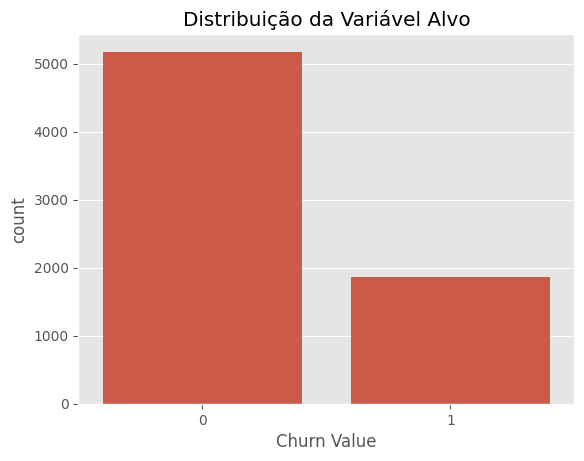

In [ ]:
print("Total de Churn: {}".format(round(df['Churn Value'].value_counts()[1] / df.shape[0],2)))
print("Total de Não Churn: {}".format(round(df['Churn Value'].value_counts()[0] / df.shape[0],2)))
sns.countplot(x='Churn Value', data=df)
plt.title('Distribuição da Variável Alvo')

Vamos entender um pouco melhor como está dividida nossa base de dados, segmentando a distribuição por gênero para vermos se existe algum gênero quero é mais propício ao churn do que outro, e também o método de pagamento, uma vez que inconveniências com isso pode gerar insatisfação no cliente e consequentemente desistência do produto.

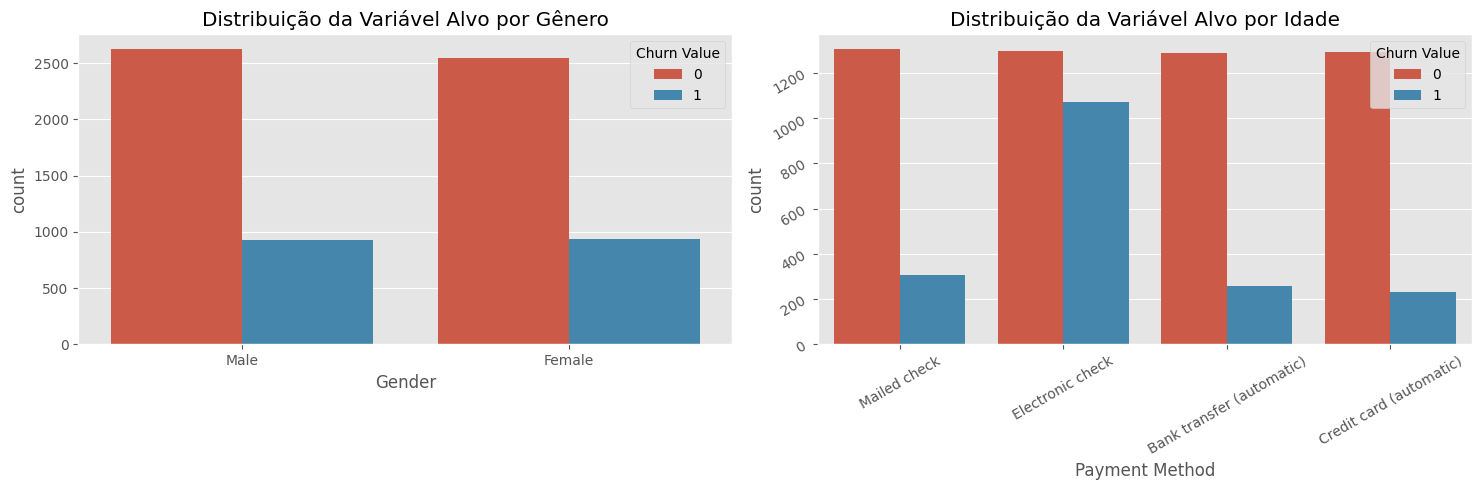

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='Gender', data=df, hue='Churn Value', ax=ax[0])
ax[0].set_title('Distribuição da Variável Alvo por Gênero');

sns.countplot(x='Payment Method', data=df, hue='Churn Value', ax=ax[1])
ax[1].set_title('Distribuição da Variável Alvo por Método de Pagamento');
ax[1].tick_params(labelrotation=30);

plt.tight_layout();

<BarContainer object of 73 artists>

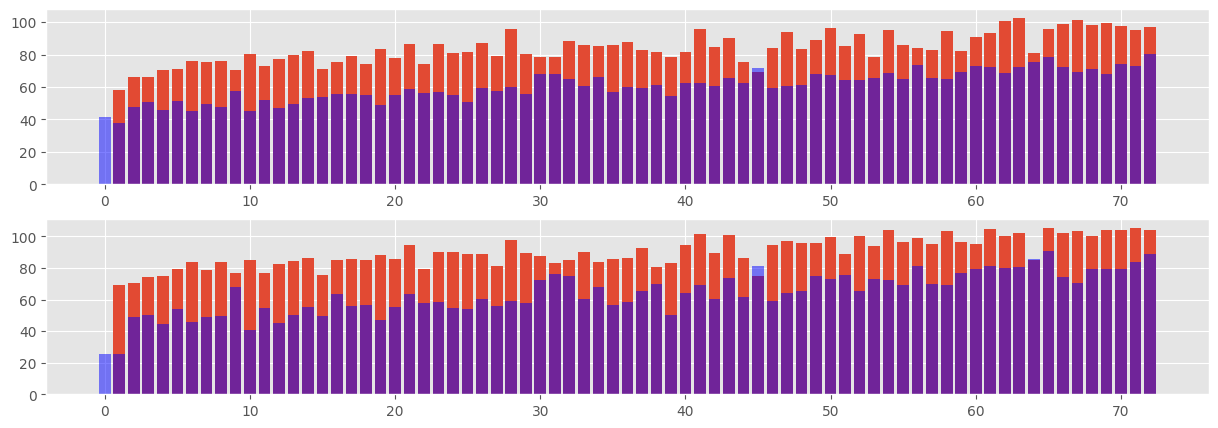

In [ ]:
mean_charges_no_churn = df[df['Churn Value'] == 1].groupby('Tenure Months')['Monthly Charges'].mean()
mean_charges_churned = df[df['Churn Value'] == 0].groupby('Tenure Months')['Monthly Charges'].mean()

median_charges_no_churn = df[df['Churn Value'] == 1].groupby('Tenure Months')['Monthly Charges'].median()
median_charges_churned = df[df['Churn Value'] == 0].groupby('Tenure Months')['Monthly Charges'].median()


fig, ax = plt.subplots(2,1,figsize=(15,5))

ax[0].bar(mean_charges_no_churn.index, mean_charges_no_churn.values)
ax[0].bar(mean_charges_churned.index, mean_charges_churned.values, color='b', alpha=.5)

ax[1].bar(median_charges_no_churn.index, median_charges_no_churn.values)
ax[1].bar(median_charges_churned.index, median_charges_churned.values, color='b', alpha=.5)

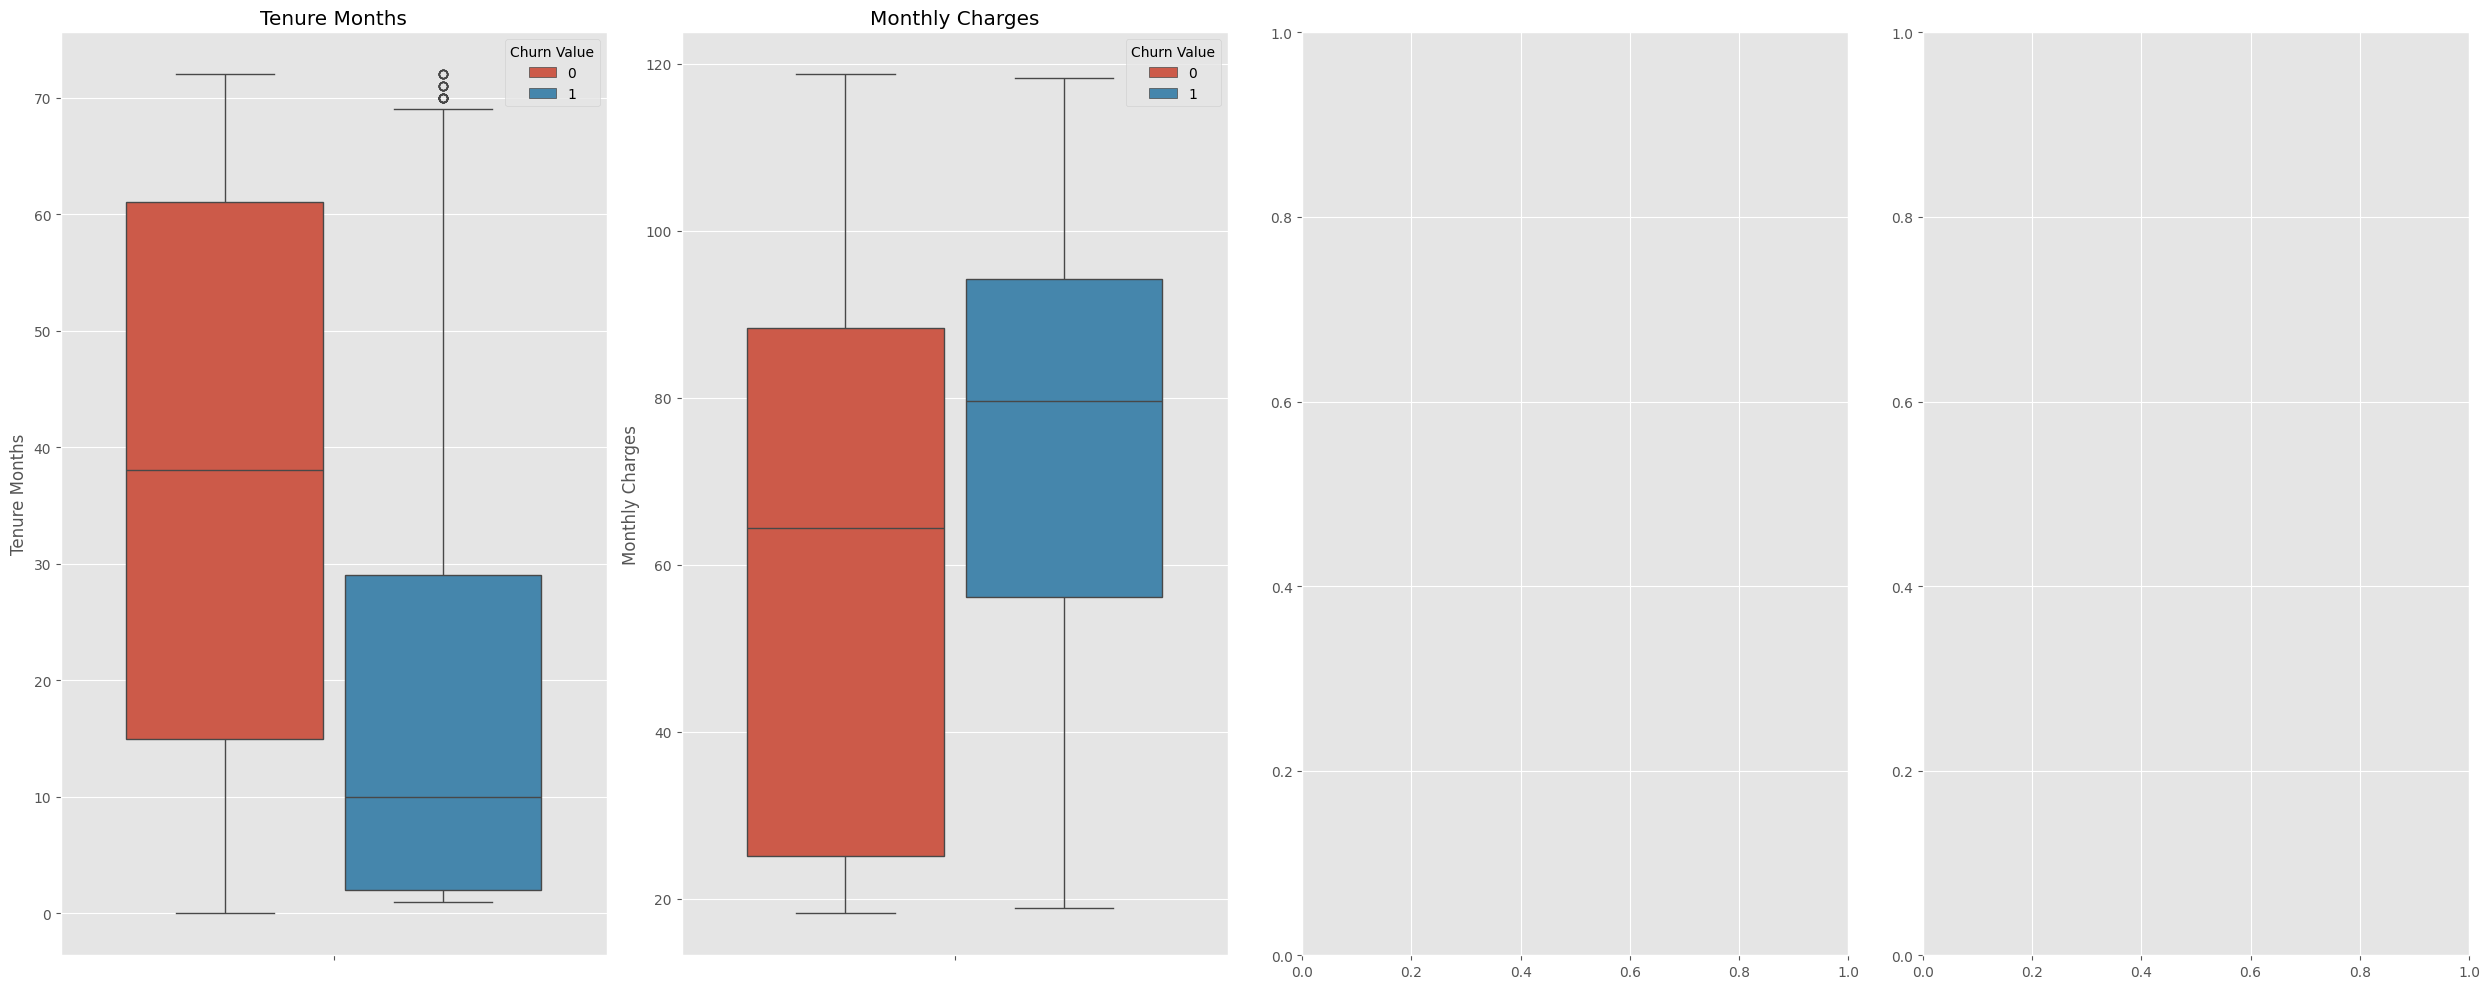

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(25,10))

sns.boxplot(data=df, y= 'Tenure Months',hue='Churn Value', gap=.1,  ax=ax[0])
ax[0].set_title('Tenure Months')

sns.boxplot(data=df, y= 'Monthly Charges', hue='Churn Value', gap=.1, ax=ax[1])
ax[1].set_title('Monthly Charges')

plt.tight_layout();

## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*